In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
    
from mapper_functions import plot_global
from mapper_functions import plot_na

In [2]:
from my_functions import read_obsfcstana

path = '/discover/nobackup/amfox/Experiments/ASCAT_JJA_QC_0/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  1803473


In [3]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [4]:
# Make obarray
    
numobs = len(obs_obs)
obarray = np.empty([numobs, 4])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs
obarray[:, 3] = obs_fcst

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

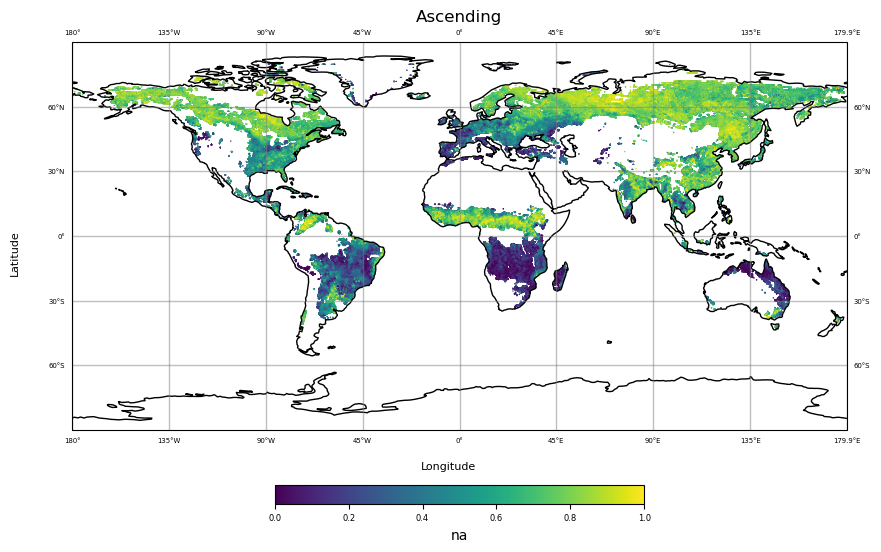

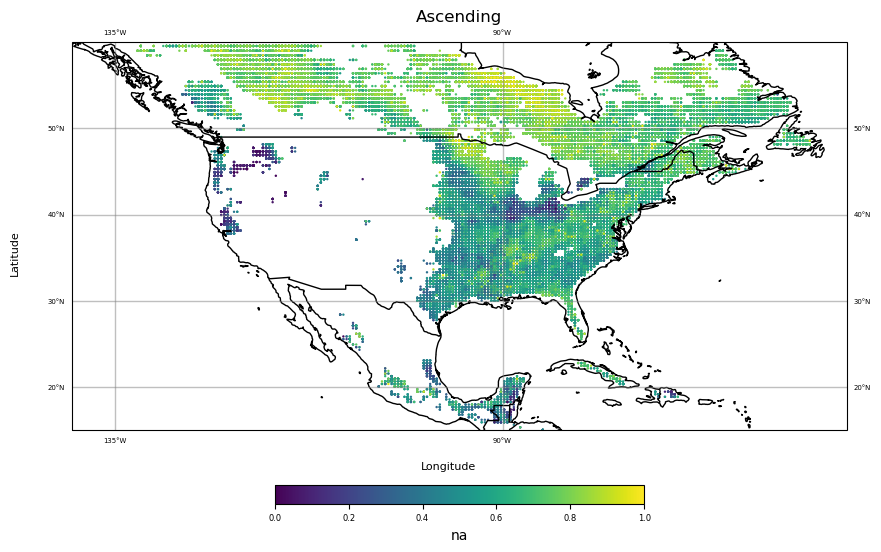

In [5]:
saveflag = False

tmp = obarray[(obs_obsvar == 1),0]
numobs = len(tmp)
ascend = np.empty([numobs, 4])

ascend[:,0] = obarray[(obs_obsvar == 1),0]
ascend[:,1] = obarray[(obs_obsvar == 1),1]
ascend[:,2] = obarray[(obs_obsvar == 1),2]
ascend[:,3] = obarray[(obs_obsvar == 1),3]

plot_global(ascend,saveflag,'Ascending') 
plot_na(ascend,saveflag,'Ascending') 

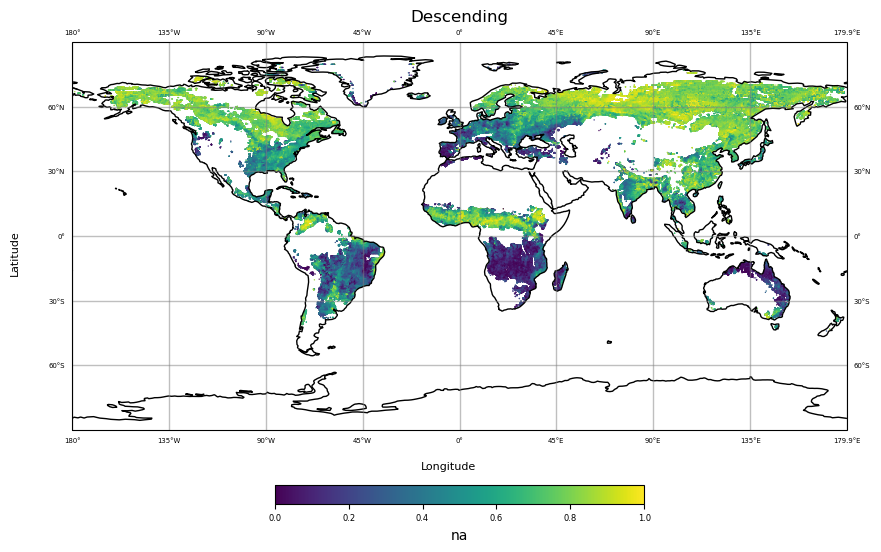

In [6]:
tmp = obarray[(obs_obsvar == 4),0]
numobs = len(tmp)
descend = np.empty([numobs, 4])

descend[:,0] = obarray[(obs_obsvar == 4),0]
descend[:,1] = obarray[(obs_obsvar == 4),1]
descend[:,2] = obarray[(obs_obsvar == 4),2]
descend[:,3] = obarray[(obs_obsvar == 4),3]

saveflag = False
plot_global(descend,saveflag,'Descending') 

 Saving figure as QC_0_Unique_Counts_JJA_2019.png 



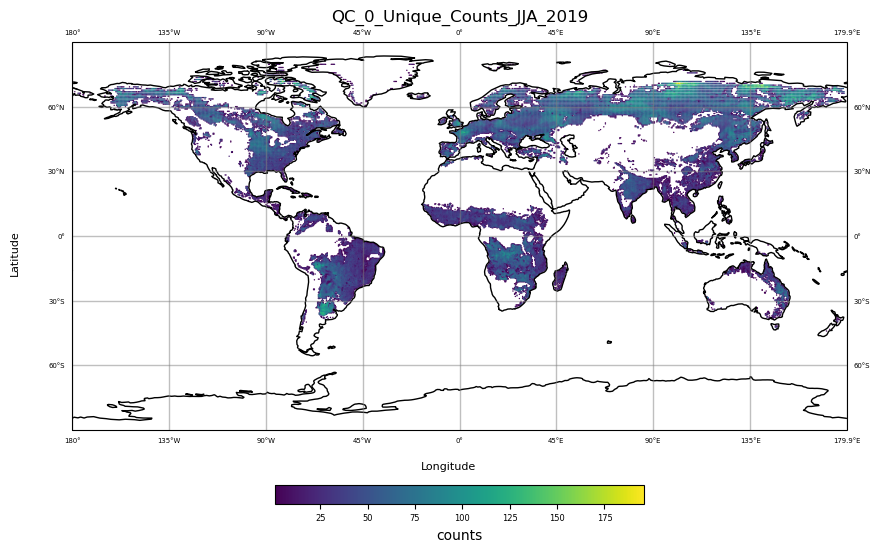

 Saving figure as QC_0_NA unique_counts_JJA_2019.png 



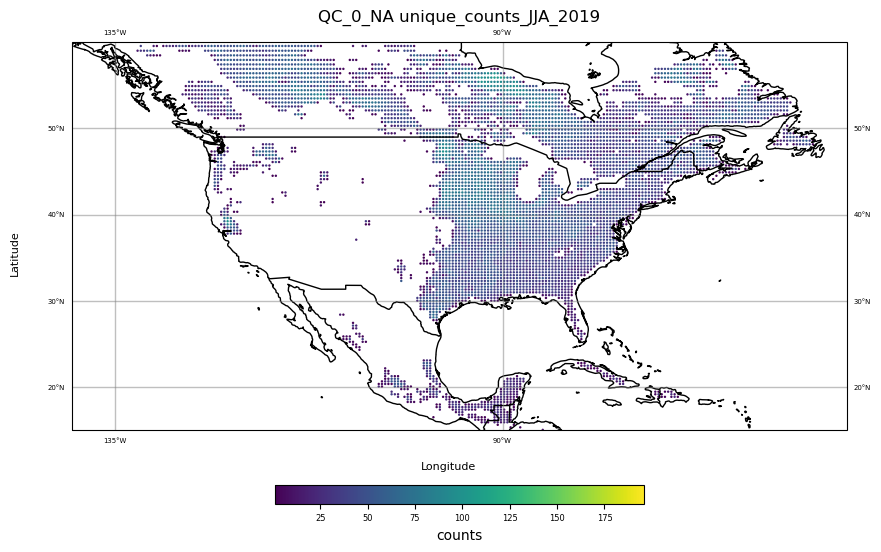

[ 3  7 41 ... 55 31 56]


In [7]:
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs


# find the unique rows based on values in the second and third columns
unique_rows, unique_indices, unique_counts = np.unique(obarray[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)

# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

tmp = np.empty([num_unique_rows, 3])
tmp[:, 1] = obarray[unique_indices, 1]
tmp[:, 2] = obarray[unique_indices, 2]
tmp[:, 0] = unique_counts

saveflag = True
plot_global(tmp,saveflag,'QC_0_Unique_Counts_JJA_2019','counts') 
plot_na(tmp,saveflag,'QC_0_NA unique_counts_JJA_2019','counts') 

print(f"{unique_counts}")

In [8]:
len(unique_counts), numobs

(43085, 1803473)

In [9]:
# find the unique rows based on values in the second and third columns
unique_rows, unique_inverse_indices = np.unique(obarray[:, 1:], axis=0, return_index=False, return_inverse=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)

# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

mean_obs = np.empty([num_unique_rows,3])
mean_omf = np.empty([num_unique_rows,3])
std_omf = np.empty([num_unique_rows,3])

for i in range(len(unique_rows)):
    indices_of_unique_value = np.where(unique_inverse_indices == i)[0]
    # print(f"Indices of {unique_rows[i]}: {indices_of_unique_value}")
    mean_obs[i, 0] = np.nanmean(obs_obs[indices_of_unique_value])
    mean_obs[i, 1:] = unique_rows[i,:]
    mean_omf[i, 0] = np.nanmean(obs_obs[indices_of_unique_value] - obs_fcst [indices_of_unique_value])
    mean_omf[i, 1:] = unique_rows[i,:]
    std_omf[i, 0] = np.nanstd(obs_obs[indices_of_unique_value] - obs_fcst [indices_of_unique_value])
    std_omf[i, 1:] = unique_rows[i,:]

 Saving figure as Mean Obs JJA 2019 QC 0.png 



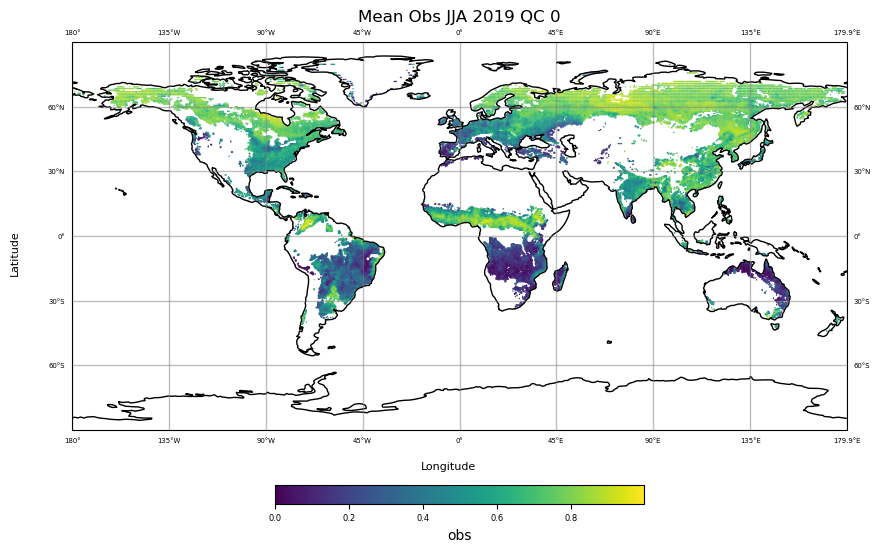

 Saving figure as Mean OmF JJA 2019 QC 0.png 



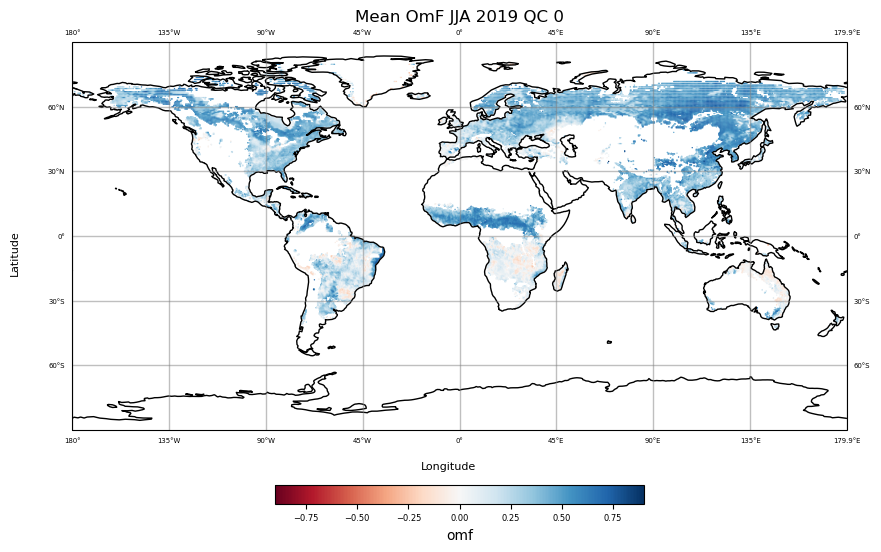

 Saving figure as Std OmF JJA 2019 QC 0.png 



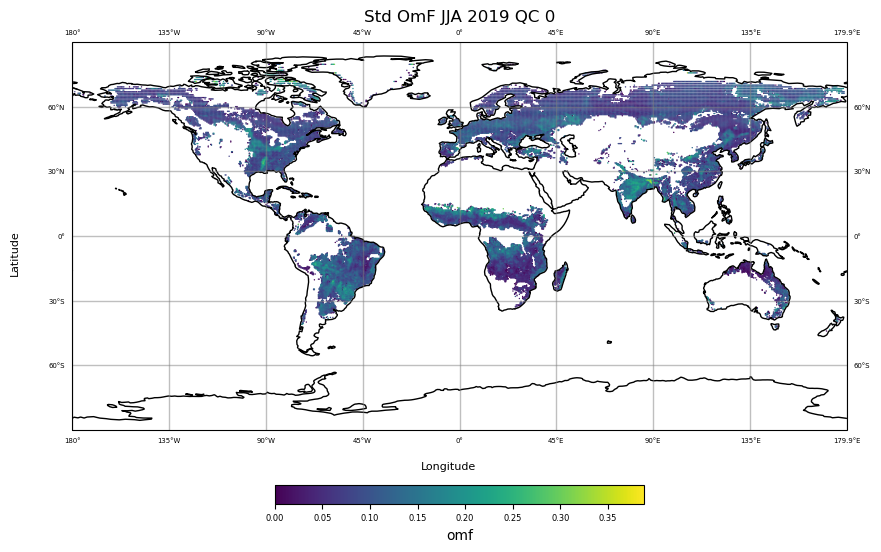

 Saving figure as NA Mean OmF JJA 2019 QC 0.png 



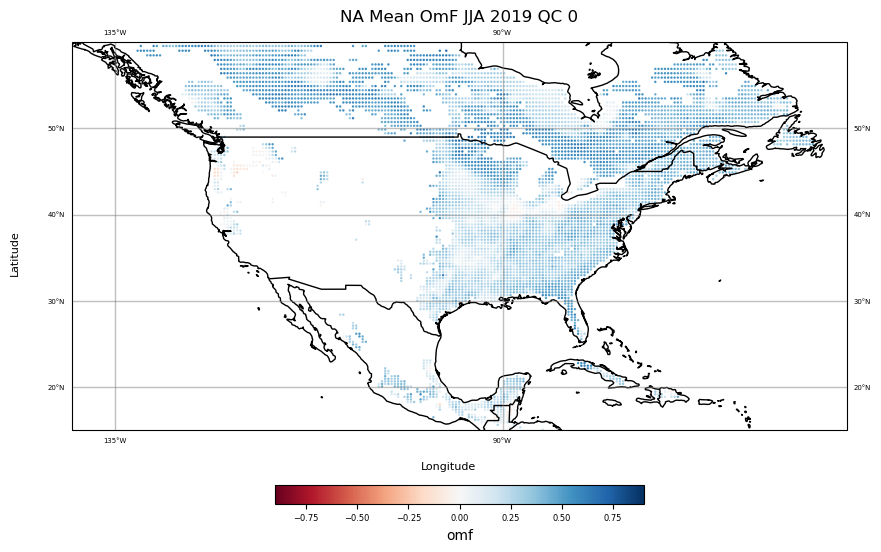

In [10]:
saveflag = True
plot_global(mean_obs,saveflag,'Mean Obs JJA 2019 QC 0','obs') 
plot_global(mean_omf,saveflag,'Mean OmF JJA 2019 QC 0','omf') 
plot_global(std_omf,saveflag,'Std OmF JJA 2019 QC 0','omf') 
plot_na(mean_omf,saveflag,'NA Mean OmF JJA 2019 QC 0','omf') 

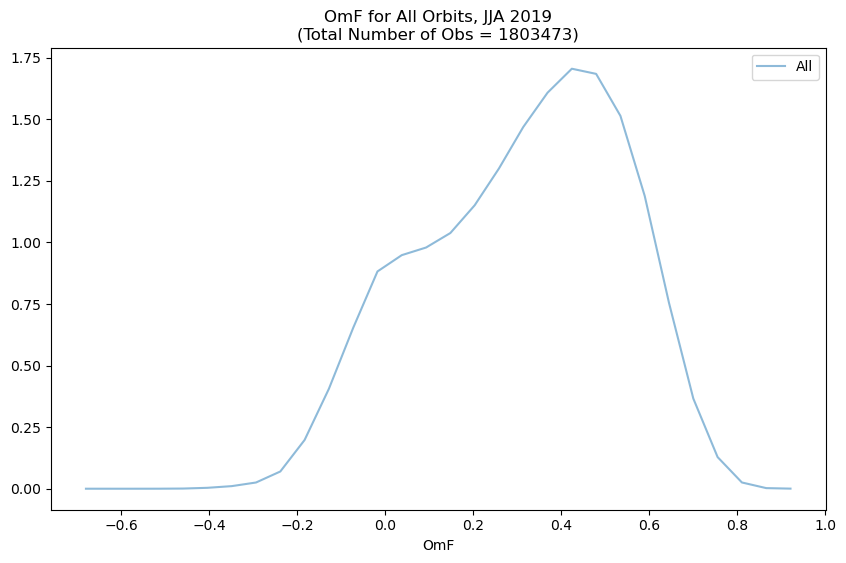

In [11]:
all_data = obs_obs - obs_fcst

# Create histograms for each data set
#plt.hist(all_data, bins=30, density=True, alpha=0.5, label='All')
#plt.hist(ascend_data, bins=30, density=True, alpha=0.5, label='Ascend')
#plt.hist(descend_data, bins=30, density=True, alpha=0.5, label='Descend')

# Create probability density function for each data set
fig = plt.figure(figsize=(10, 6))

all_counts, all_bins = np.histogram(all_data, bins=30, density=True)
plt.plot(all_bins[:-1], all_counts, alpha=0.5, label='All')

# Add x-axis label and title
plt.xlabel('OmF')
plt.title('OmF for All Orbits, JJA 2019\n(Total Number of Obs = {})'.format(len(all_data)))

# Add legend to the plot
plt.legend()

# Save the plot as a PNG file
plt.savefig('omf_pdf JJA QC 0.png', dpi = 400)

# Show the plot
plt.show()

In [12]:
from my_functions import read_obsfcstana

path = '/discover/nobackup/amfox/Experiments/ASCAT_JJA_QC_04/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna'
printflag = False

date_time2, obs_species2, obs_tilenum2, obs_lon2, obs_lat2, obs_obs2, obs_obsvar2, obs_fcst2, obs_fcstvar2, obs_ana2, obs_anavar2 = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  3807890


In [3]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar2[obs_obsvar2 == nodata] = np.nan
obs_fcst2[obs_fcst2 == nodata] = np.nan
obs_fcstvar2[obs_fcstvar2 == nodata] = np.nan
obs_ana2[obs_ana2 == nodata] = np.nan
obs_anavar2[obs_anavar2 == nodata] = np.nan

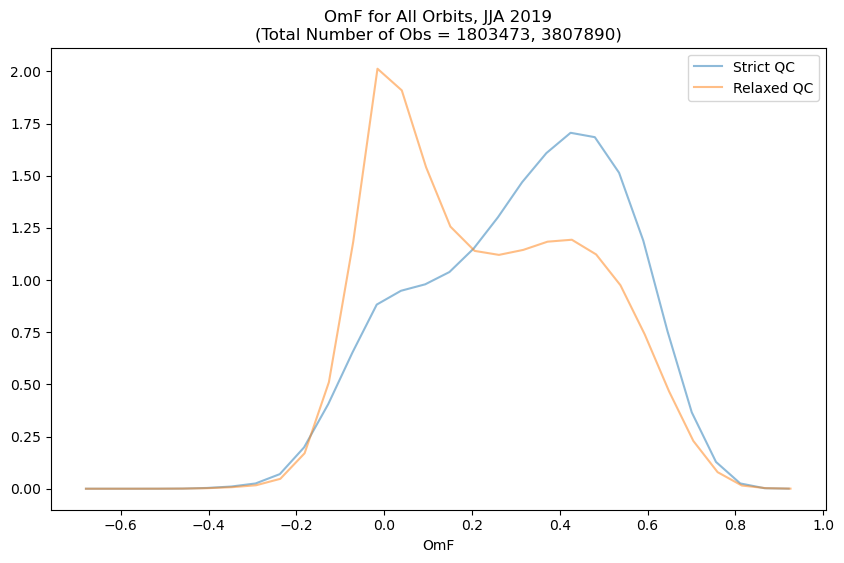

In [14]:
all_data = obs_obs - obs_fcst
all_data2 = obs_obs2 - obs_fcst2

# Create histograms for each data set
#plt.hist(all_data, bins=30, density=True, alpha=0.5, label='All')
#plt.hist(ascend_data, bins=30, density=True, alpha=0.5, label='Ascend')
#plt.hist(descend_data, bins=30, density=True, alpha=0.5, label='Descend')

# Create probability density function for each data set
fig = plt.figure(figsize=(10, 6))

all_counts, all_bins = np.histogram(all_data, bins=30, density=True)
plt.plot(all_bins[:-1], all_counts, alpha=0.5, label='Strict QC')

all2_counts, all2_bins = np.histogram(all_data2, bins=30, density=True)
plt.plot(all2_bins[:-1], all2_counts, alpha=0.5, label='Relaxed QC')

# Add x-axis label and title
plt.xlabel('OmF')
plt.title('OmF for All Orbits, JJA 2019\n(Total Number of Obs = {}, 3807890)'.format(len(all_data)))

# Add legend to the plot
plt.legend()

# Save the plot as a PNG file
plt.savefig('omf_pdf JJA QC both.png', dpi = 400)

# Show the plot
plt.show()